In [89]:
from keras.datasets import mnist

Loading the data

In [90]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [91]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

Reshaping input features x_train & x_test because CNN takes 4D data

In [92]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Normalizing the input features x_train & x_test

In [93]:
x_train = x_train/255
x_test = x_test/255

Changing target values/labels to categorical because of CNN

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
If target values are changed to categorical for ONE HOT ENCODING then the loss function should be categorical_crossentropy

In [95]:
# One hot encoding
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [96]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras import Sequential

In [97]:
model = Sequential()

In [98]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [100]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [101]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,batch_size=64)

Epoch 1/12
938/938 [==============================] - 40s 41ms/step - loss: 0.1858 - accuracy: 0.9430 - val_loss: 0.1028 - val_accuracy: 0.9680
Epoch 2/12
938/938 [==============================] - 40s 42ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0471 - val_accuracy: 0.9853
Epoch 3/12
938/938 [==============================] - 40s 43ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 4/12
938/938 [==============================] - 40s 43ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 5/12
938/938 [==============================] - 40s 43ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0284 - val_accuracy: 0.9912
Epoch 6/12
938/938 [==============================] - 40s 42ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0290 - val_accuracy: 0.9922
Epoch 7/12
938/938 [==============================] - 38s 41ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0307 - val_accuracy:

In [102]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0344 - accuracy: 0.9926


[0.03442252054810524, 0.9926000237464905]

In [103]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [104]:
import numpy as np
np.argmax(y_pred)

7

In [105]:
import cv2

In [106]:
mat = cv2.imread("rough.png")

In [107]:
mat.shape

(28, 28, 3)

In [108]:
import matplotlib.pyplot as plt

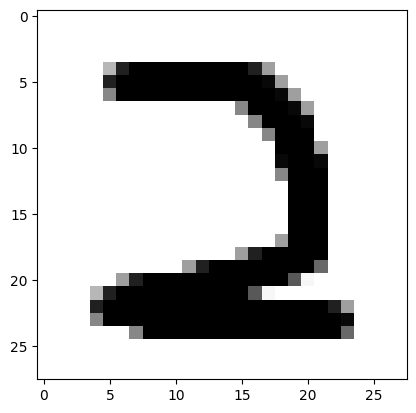

In [109]:
plt.imshow(mat)

In [110]:
test = mat[:,:,:1]

In [111]:
test.shape

(28, 28, 1)

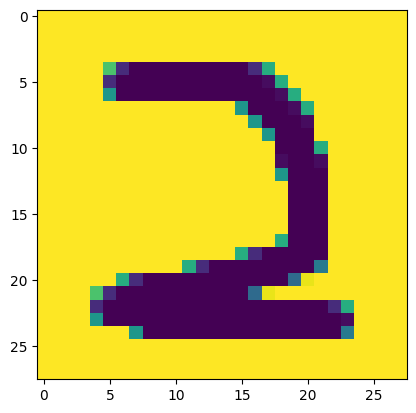

In [112]:
plt.imshow(test)

In [113]:
test = np.invert(test)

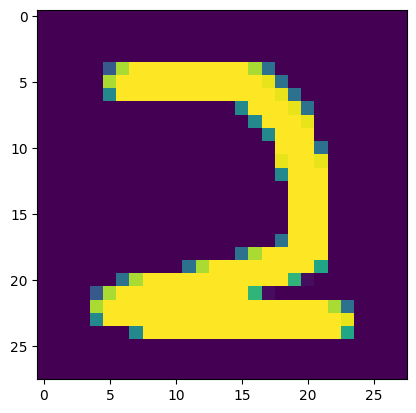

In [114]:
plt.imshow(test)

In [115]:
ar = np.array([test])

In [116]:
ar.shape

(1, 28, 28, 1)

In [117]:
pred = model.predict(ar)

1/1 [==============================] - 0s 156ms/step


In [118]:
np.argmax(pred)

2